In [ ]:
# SPAM DETECTION MODEL


In [1]:
# IMPORTING LIBRARIES

from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score



In [7]:
# LOADING DATASET
data_mails = pd.read_csv("C:/Users/User/Desktop/spam.csv")
data_mails.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [8]:
# Imformation about dataset
data_mails.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [9]:
data_mails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [10]:
# Check for missing values
print(data_mails.isnull().sum())

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [12]:
# DATA PREPARATION

# Text Cleaning
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and extra whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove multiple whitespaces
    text = re.sub(r'\s+', ' ', text)
    return text


In [13]:
data_mails['cleaned_text'] = data_mails['text'].apply(clean_text)
data_mails

,Unnamed: 0,label,text,label_num,cleaned_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter this is a follow ...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom for january see attached file ...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho we re around to ...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject re indian springs this deal is to book...
...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,subject put the on the ft the transport volume...
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,subject and following noms hpl can t take the ...
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,subject calpine daily gas nomination julie as ...
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,subject industrial worksheets for august activ...


In [14]:
# FEATURE ENGINEERING
# Assuming you want to use the length of the text as a feature
data_mails['text_length'] = data_mails['cleaned_text'].apply(len)
data_mails['text_length']

0        280
1         67
2       2329
3        395
4        320
        ... 
5166     284
5167     727
5168     310
5169     481
5170    1066
Name: text_length, Length: 5171, dtype: int64

In [16]:
# Encoding Labels
label_encoder = LabelEncoder()
data_mails['label_num'] = label_encoder.fit_transform(data_mails['label'])
data_mails['label_num']

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int32

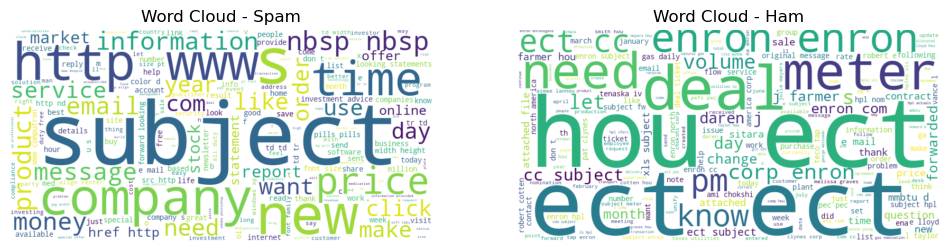

In [17]:
# Visualization - Word Cloud for Spam and Ham
spam_wordcloud = WordCloud(width=800, height=400, 
                           background_color='white', 
                           stopwords=ENGLISH_STOP_WORDS).generate(
    ' '.join(data_mails[data_mails['label'] == 'spam']['cleaned_text']))
ham_wordcloud = WordCloud(width=800, height=400, 
                          background_color='white', 
                          stopwords=ENGLISH_STOP_WORDS).generate(
    ' '.join(data_mails[data_mails['label'] == 'ham']['cleaned_text']))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Spam')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Ham')
plt.axis('off')

plt.show()




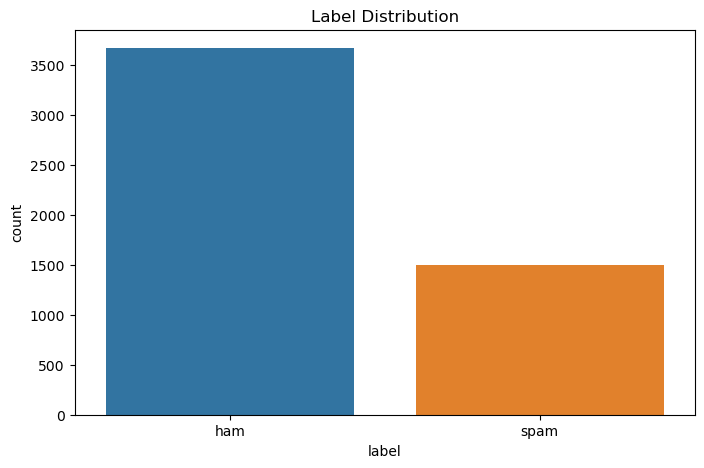

In [18]:
# Visualization - Bar Plot for Label Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=data_mails)
plt.title('Label Distribution')
plt.show()


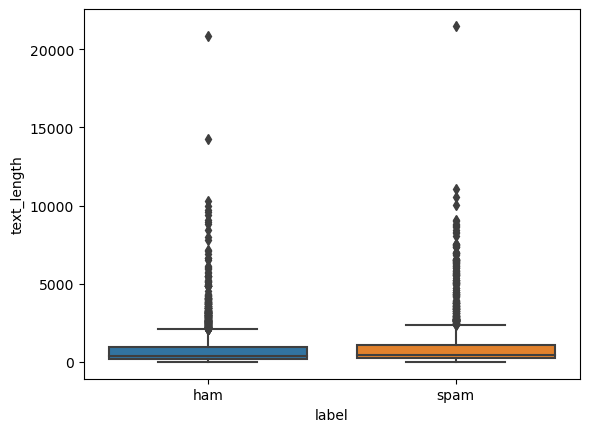

In [19]:
# Visualization: Text Length vs. Label)
sns.boxplot(x='label', y='text_length', data=data_mails)
plt.show()

In [20]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_mails[['cleaned_text', 'text_length']], 
                                                    data_mails['label_num'], test_size=0.2, random_state=42)


In [21]:
print(X_train)

                                           cleaned_text  text_length
5132  subject april activity surveys we are starting...          836
2067  subject message subject hey i am julie i just ...          421
4716  subject txu fuels sds nomination for may attac...          296
4710  subject re richardson volumes nov and dec mete...         1048
2268  subject a new era of online medical care a new...          329
...                                                 ...          ...
4426  subject re ena sales on hpl last that i had wa...         4230
466   subject tenaska iv bob i understand from sandi...         1917
3092  subject broom bristles up flew be differentiab...         1349
3772  subject calpine daily gas nomination weekend r...          145
860   subject re meter yep you re right except it s ...          501

[4136 rows x 2 columns]


In [22]:
print(y_train)

5132    0
2067    1
4716    0
4710    0
2268    1
       ..
4426    0
466     0
3092    1
3772    0
860     0
Name: label_num, Length: 4136, dtype: int32


In [23]:
print(X_test)

                                           cleaned_text  text_length
1566  subject hpl nom for march see attached file hp...           63
1988  subject online pharxmacy off all meds disscoun...        21484
1235  subject re nom actual volume for april th we a...          277
2868  subject re meter dec robert and i put our head...         2767
4903  subject re coastal oil gas corporation melissa...         9706
...                                                 ...          ...
1175  subject alert spam prevention cllck the stop s...          110
4476  subject enron and blockbuster to launch entert...          515
4198  subject make your computer like new remove the...          488
2689  subject temp forecast model xls this is the fi...           83
2142  subject enron hpl actuals for august teco tap ...           85

[1035 rows x 2 columns]


In [24]:
print(y_test)

1566    0
1988    1
1235    0
2868    0
4903    0
       ..
1175    1
4476    0
4198    1
2689    0
2142    0
Name: label_num, Length: 1035, dtype: int32


In [43]:
print(y_train)

5132    0
2067    1
4716    0
4710    0
2268    1
       ..
4426    0
466     0
3092    1
3772    0
860     0
Name: label_num, Length: 4136, dtype: int32


In [25]:
# Text Vectorization (using TF-IDF)

tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['cleaned_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['cleaned_text'])


In [26]:
# Display the shape of the TF-IDF matrices
print("TF-IDF Matrix Shape (Training):", X_train_tfidf.shape)
print("TF-IDF Matrix Shape (Testing):", X_test_tfidf.shape)


TF-IDF Matrix Shape (Training): (4136, 5000)
TF-IDF Matrix Shape (Testing): (1035, 5000)


In [50]:
# Select only the categorical features for X_train_categorical
X_train_categorical = data_mails['label']
X_test_categorical =  data_mails['label']

# Reshape the data to a 2D array
X_train_categorical_reshaped = X_train_categorical.values.reshape(-1, 1)
X_test_categorical_reshaped = X_test_categorical.values.reshape(-1, 1)

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train_categorical_reshaped)
X_test_encoded = encoder.transform(X_test_categorical_reshaped)

In [56]:
# MODELING, TRAINING AND EVALUATION
classifiers = {
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}
for name, classifier in classifiers.items():
    print(f"\nTraining {name}...")
    classifier.fit(X_train_tfidf, y_train)
    y_pred = classifier.predict(X_test_tfidf)



Training Support Vector Machine...

Training Logistic Regression...

Training k-Nearest Neighbors...

Training Decision Tree...

Training Random Forest...

Training AdaBoost...

Training Gradient Boosting...


In [57]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix for {name}:\n{cm}")



Confusion Matrix for Gradient Boosting:
[[720  22]
 [ 21 272]]


In [71]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy for {name}: {accuracy}")



Accuracy for Gradient Boosting: 0.9584541062801932


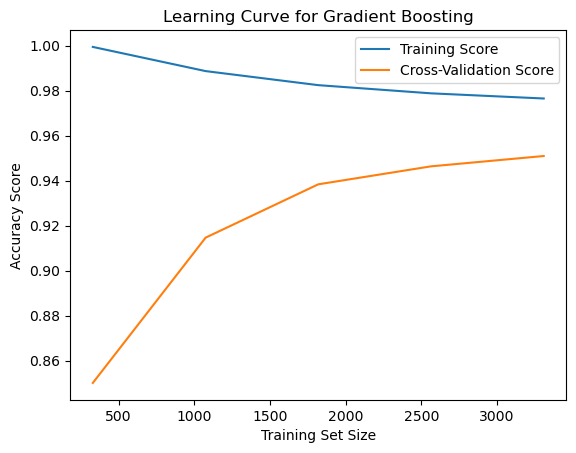

In [60]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(classifier, X_train_tfidf, y_train, cv=5, scoring='accuracy')
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title(f'Learning Curve for {name}')
plt.legend()
plt.show()
